In [23]:
from numba import jit # https://numba.pydata.org/
import random

@jit(nopython=True)
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

def main():
    print(monte_carlo_pi(10000))
    
if __name__=='__main__':
    main()

3.1132


### Numba

careful: does not work well with Pandas -> test preprocessing, clean data, then deploy numba for performance-intensive parts

In [24]:
from numba import jit
import numpy as np
import time

x = np.arange(100).reshape(10, 10)

@jit(nopython=True)
def go_fast(a): # Function is compiled and runs in machine code
    trace = 0.0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace

# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.time()
go_fast(x)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE
start = time.time()
go_fast(x)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

Elapsed (with compilation) = 0.3666656017303467
Elapsed (after compilation) = 0.0


0 0.9999720684626245
100 0.006459538782427279
[9.97382582e-01 3.74493177e-05 5.36757962e-05 4.00798863e-05]
w1


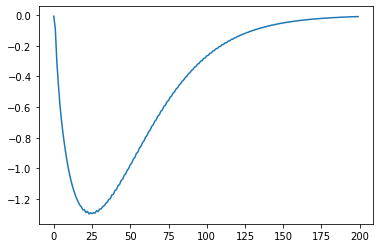

w2


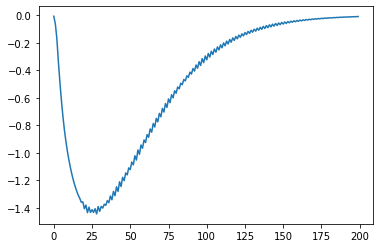

In [100]:
# simple NN iteration test: weight development
import numpy as np
import matplotlib.pyplot as plt
import random

modeldim = 4
nshown = 4
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = nshown+1, modeldim, 4, modeldim

inpt = np.ones(modeldim) # input
y = np.zeros(D_out) # truth
y[0] = 1

# Randomly initialize weights
w1 = np.random.randn(D_in, H)*0.01
w2 = np.random.randn(H, D_out)*0.01

b1 = np.zeros(H) # bias
b2 = np.zeros(D_out)

mw1 = np.zeros_like(w1)
mw2 = np.zeros_like(w2)
mb1 = np.zeros_like(b1)
mb2 = np.zeros_like(b2)

# graph weights
yw1 = []
yw2 = []

learning_rate = 1e-2

for t in range(200):
    # Forward pass: compute predicted y
    h = np.dot(inpt, w1) + b1
    h_relu = np.maximum(h, 0)
    #h_relu = softmax(h)
    #y_pred = np.dot(h_relu, w2) + b2 # output
    y_pred = np.dot(w2.T, h_relu) + b2 # output

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 0:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = (y_pred - y)
    #print(h_relu, ' : ', grad_y_pred.T, ' : ', h_relu)
    grad_w2 = np.dot(h_relu, np.ones_like(w2)) * grad_y_pred # dw2 = (.) ReLu(h)
    grad_b2 = grad_y_pred
    grad_h_relu = np.dot(grad_y_pred, w2.T) # dw1 = (.) w2 ReLu'(h) x
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0 # ReLU'
    grad_w1 = np.dot(inpt.T, np.ones_like(w1)) * grad_h
    grad_b1 = np.dot(w2, grad_y_pred.T)

    # Update weights
    #w1 -= learning_rate * grad_w1
    #w2 -= learning_rate * grad_w2
    #b1 -= learning_rate * grad_b1.T[0]
    #b2 -= learning_rate * grad_b2[0]
    for param, dparam, mem in zip([w1, w2, b1, b2], [grad_w1, grad_w2, grad_b1.T[0], grad_b2[0]], [mw1, mw2, mb1, mb2]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update
        
    yw1.append(np.sum(grad_w1))
    yw2.append(np.sum(grad_w2))
        
print(y_pred)
x = range(len(yw1))
print('w1')
plt.plot(x, yw1)
plt.show()
print('w2')
plt.plot(x, yw2)
plt.show()

In [5]:
# pandas load test 
import pandas as pd
import os

os.chdir('D:\BernieData\DeepL\lrgtxt0')
# Read data from file 'filename.csv' 
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("SP500.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-14,2886.820068,2894.449951,2879.620117,2886.979980,2886.979980,2922330000
1,2019-06-17,2889.750000,2897.270020,2887.300049,2889.669922,2889.669922,2810140000
2,2019-06-18,2906.709961,2930.790039,2905.439941,2917.750000,2917.750000,3437620000
3,2019-06-19,2920.550049,2931.739990,2911.429932,2926.459961,2926.459961,3287890000
4,2019-06-20,2949.600098,2958.060059,2931.500000,2954.179932,2954.179932,3905940000


In [7]:
s = pd.Series(data['Close'])

#for l in range(-15,15):
    #print(l, s.autocorr(lag=l))
s.autocorr()

0.9620643684499119

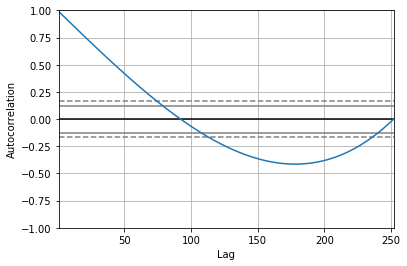

In [10]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

os.chdir('D:\BernieData\DeepL\lrgtxt0')
#dr = pd.date_range(start='1984-01-01', end='1984-12-31')
dr = pd.read_csv("SP500.csv") 

df = pd.DataFrame(np.arange(len(dr)), index=dr, columns=["Close"])
autocorrelation_plot(df)
plt.show()

In [11]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])

df.corr(method=histogram_intersection)

,dogs,cats
dogs,1.0,0.3
cats,0.3,1.0


1942 1512 252
lag  -5 0.17166829863944602
lag  -4 0.1730406246542056
lag  -3 0.1745084712767722
lag  -2 0.17595926368860224
lag  -1 0.17749337945673865
lag  0 0.17939494958136332
lag  1 0.1820333719068394
lag  2 0.18485214570971198
lag  3 0.18744457402683853
lag  4 0.19000971218903856
lag  5 0.19249761578953242


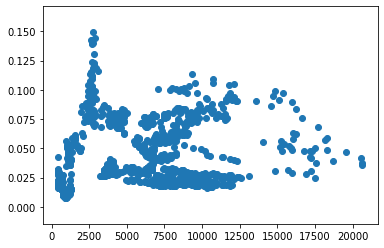

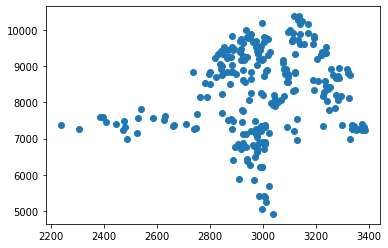

In [37]:
# correlation stock market - cryptocurr test 
import pandas as pd
import os
import matplotlib.pyplot as plt

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

def crosscorr(datax, datay, lag=0):
    '''lag crosscorrelation'''
    return datax.corr(datay.shift(lag))

def df_shifted(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for c in df.columns:
        if c == target:
            new[c] = df[target]
        else:
            new[c] = df[c].shift(periods=lag)
    return  pd.DataFrame(data=new)

os.chdir('D:\BernieData\DeepL\lrgtxt0')
# Read data from file 'filename.csv' 
# Control delimiters, rows, column names with read_csv (see later) 
spdata = pd.read_csv("SP500.csv")
ndqdata = pd.read_csv("nasdaq.csv")
btcdata = pd.read_csv("Cexio_BTCUSD_d.csv")
ethdata = pd.read_csv("Cexio_ETHBTC_d.csv")

# Preview the first 5 lines of the loaded data 
#spdata.head()
#btcdata.head()

#print(btcdata['Close'])
#s0 = spdata['Close']
#s1 = btcdata['Close']
#dcomb = {'sp500': spdata['Close'], 'btcusd': btcdata['Close']}
#df = pd.DataFrame(data=dcomb)

#s0.corr(s1, method=histogram_intersection)
#df_new = df_shifted(df, 'sp500', lag=-1)
#print(df_new)
print(len(btcdata['Close']), len(ethdata['Close']), len(spdata['Close']))
for lg in range(-5,6):
    #print('lag ', lg, crosscorr(ndqdata['Close'][0:100], ethdata['Close'][0:100], lg))
    #print('lag ', lg, crosscorr(ndqdata['Close'], ethdata['Close'], lg))
    print('lag ', lg, crosscorr(btcdata['Close'], ethdata['Close'], lg))
    
plt.scatter(btcdata['Close'][0:1512], ethdata['Close'][0:1512])
plt.show()
plt.scatter(spdata['Close'][0:252], btcdata['Close'][0:252])
plt.show()

In [10]:
# D&D chromosomes (from Munroes What if...)
import random

def ddstat(): # strict ;)
    '''roll stat dice'''
    return random.randint(1,6) + random.randint(1,6) + random.randint(1,6)

def createcset(l):
    '''create a a character set: either a stat value or a multiplier'''
    res = []
    for i in range(l-1):
        if random.random() > 0.8:
            res.append(-random.uniform(0.5, 2.5)) # multiplier
        else:
            res.append(ddstat())
    res.append(random.choice([-1, 1])) # last stat is sex (-1 female, 1 male)
    return res

def combine(cset0, cset1):
    '''combine two character sets'''
    if len(cset0) != len(cset1):
        return -1
    res = []
    for ic in range(len(cset0)-1):
        if cset0[ic] < 0: # multipliers are negative
            if cset1[ic] < 0:
                res.append(1) # multiplier on both sides: you get a 1
            else:
                res.append(int(-cset0[ic] * cset1[ic]))
        else:
            if cset1[ic] < 0:
                res.append(int(-cset0[ic] * cset1[ic]))
            else:
                res.append(max(cset0[ic], cset1[ic]))
    if cset0[len(cset0)-1] < 0:
        if cset1[len(cset1)-1] < 0:
            res.append(-1) # female
        else:
            if random.random() > 0.5:
                res.append(1)
            else:
                res.append(-1)
    else:
        if cset1[len(cset1)-1] < 0:
            if random.random() > 0.5:
                res.append(1)
            else:
                res.append(-1)
        else:
            res.append(1) # male
    return res

if __name__=="__main__":
    print(combine([15, -2, -1, 12, -0.5, 14, -1], [5, 12, 14, -1.5, 14, 15, -1]))
    print(ddstat())
    print(createcset(7))
    print(combine(createcset(7), createcset(7)))

[15, 24, 14, 18, 7, 15, -1]
15
[-1.4079717394445106, 15, 7, 11, 7, -1.4191107472943223, 1]
[9, 9, 8, 13, 11, 21, 1]


In [6]:
# yet another attention test
import numpy as np

def softmax(x):
    """softmax applied to set of values x"""
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

def gelu(x, deriv=False):
    '''GELU activation'''
    x3 = x*x*x
    if deriv:
        v0 = 0.0356774*x3+0.797885*x
        #return 0.5*(np.tanh(0.0356774*x*x*x+0.797885*x) + (0.107032*x*x*x+0.797885*x) /
                    #np.cosh(0.0356774*x*x*x+0.797885*x) + 1.)
        return 0.5*(np.tanh(v0) + (0.107032*x3+0.797885*x) / np.cosh(v0) + 1.)        
    else:
        return x/2 * (1 + np.tanh(0.797885*x+0.035677427775*x3)) # math.sqrt(2/math.pi) = 0.797885

enc_hidd_st = np.array([[0,1,1], [.5,0,1], [1,1,0], [0,.5,1]])
dec_hid_st = np.array([[1, -1, 2]])

scores = np.dot(enc_hidd_st, dec_hid_st.T)
sm_scores = softmax(scores)
ctx_vec = enc_hidd_st * sm_scores

print('context vector: ', np.dot(np.array([[1,1,1,1]]), ctx_vec))

sm_scores = gelu(scores)
ctx_vec = enc_hidd_st * sm_scores

print('context vector: ', np.dot(np.array([[1,1,1,1]]), ctx_vec))

context vector:  [[0.3479092  0.29236534 0.95093822]]
context vector:  [[1.24245789 1.54097797 4.7256796 ]]


In [5]:
# combinations
def comb(m,n):
    '''combinations m places n symbols'''
    if m == 1: return [[x] for x in n]
    if m == len(n): return [n]
    return [n[:1] + a for a in comb(m-1, n[1:])] + comb(m, n[1:])
    
def main():
    print(comb(3,list(range(5))))
    
if __name__=='__main__':
    main()

[[0, 1, 2], [0, 1, 3], [0, 1, 4], [0, 2, 3], [0, 2, 4], [0, 3, 4], [1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4]]


In [3]:
# RL test
def valf(c, s):
    '''sample value function'''
    return c*s

def valfsum(r, gamma, c, sts):
    '''val func state sum'''
    return sum([r+gamma*valf(c,vs) for vs in sts])

def main():
    print(valfsum(0.1, 0.5, 0.2, [1., 2., 0.1, 0.2]))
    
if __name__=='__main__':
    main()

0.73


In [1]:
'''
    Tic-tac-toe game player.
    Input the index of where you wish to place your mark at your turn.
'''
 
import random
 
board = list('123456789')
wins = ((0,1,2), (3,4,5), (6,7,8),
        (0,3,6), (1,4,7), (2,5,8),
        (0,4,8), (2,4,6))
 
def printboard():
    print('\n-+-+-\n'.join('|'.join(board[x:x+3]) for x in(0,3,6)))
 
def score(board=board):
    for w in wins:
        b = board[w[0]]
        if b in 'XO' and all (board[i] == b for i in w):
            return b, [i+1 for i in w]
    return None
 
def finished():
    return all (b in 'XO' for b in board)
 
def space(board=board):
    return [ b for b in board if b not in 'XO']
 
def my_turn(xo, board):
    options = space()
    choice = random.choice(options)
    board[int(choice)-1] = xo
    return choice
 
def my_better_turn(xo, board):
    'Will return a next winning move or block your winning move if possible'
    ox = 'O' if xo =='X' else 'X'
    oneblock = None
    options  = [int(s)-1 for s in space(board)]
    for choice in options:
        brd = board[:]
        brd[choice] = xo
        if score(brd):
            break
        if oneblock is None:
            brd[choice] = ox
            if score(brd):
                oneblock = choice
    else:
        choice = oneblock if oneblock is not None else random.choice(options)
    board[choice] = xo
    return choice+1
 
def your_turn(xo, board):
    options = space()
    while True:
        choice = input("\nPut your %s in any of these positions: %s "
                       % (xo, ''.join(options))).strip()
        if choice in options:
            break
        print( "Whoops I don't understand the input" )
    board[int(choice)-1] = xo
    return choice
 
def me(xo='X'):
    printboard()
    print('\nI go at', my_better_turn(xo, board))
    return score()
 
def you(xo='O'):
    printboard()
    # Call my_turn(xo, board) below for it to play itself
    print('\nYou went at', your_turn(xo, board))
    return score()
 
 
print(__doc__)
while not finished():
    s = me('X')
    if s:
        printboard()
        print("\n%s wins along %s" % s)
        break
    if not finished():
        s = you('O')
        if s:
            printboard()
            print("\n%s wins along %s" % s)
            break
else:
    print('\nA draw')


    Tic-tac-toe game player.
    Input the index of where you wish to place your mark at your turn.

1|2|3
-+-+-
4|5|6
-+-+-
7|8|9

I go at 9
1|2|3
-+-+-
4|5|6
-+-+-
7|8|X

Put your O in any of these positions: 12345678 1

You went at 1
O|2|3
-+-+-
4|5|6
-+-+-
7|8|X

I go at 7
O|2|3
-+-+-
4|5|6
-+-+-
X|8|X

Put your O in any of these positions: 234568 2

You went at 2
O|O|3
-+-+-
4|5|6
-+-+-
X|8|X

I go at 8
O|O|3
-+-+-
4|5|6
-+-+-
X|X|X

X wins along [7, 8, 9]


In [2]:
import hashlib
# RFC 1321    test suite:
tests = (
  (b"", 'd41d8cd98f00b204e9800998ecf8427e'),
  (b"a", '0cc175b9c0f1b6a831c399e269772661'),
  (b"abc", '900150983cd24fb0d6963f7d28e17f72'),
  (b"message digest", 'f96b697d7cb7938d525a2f31aaf161d0'),
  (b"abcdefghijklmnopqrstuvwxyz", 'c3fcd3d76192e4007dfb496cca67e13b'),
  (b"ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789", 'd174ab98d277d9f5a5611c2c9f419d9f'),
  (b"12345678901234567890123456789012345678901234567890123456789012345678901234567890", '57edf4a22be3c955ac49da2e2107b67a') )
for text, golden in tests: assert hashlib.md5(text).hexdigest() == golden


In [1]:
# digits
def aa(t,h,e,s,l):
    return (101*t+10*h+11*e-11*s-900*l)/100

def main():
    #print(aa(1,2,3,4,5))
    for t in range(1,10):
        for h in range(0,10):
            for e in range(0,10):
                for s in range(0,10):
                    for l in range(1,10):
                        a = aa(t,h,e,s,l)
                        if float(a).is_integer() and t != h and h != e and e != s and s != l and l != a \
                        and t != e and t != s and t != l and t != a and h != s and h != l and h != a \
                        and e !=l and e != a and s != a and a >= 0 and a < 10:
                            print(t,h,e,s,l,int(a))
    
if __name__=='__main__':
    main()

8 7 4 2 1 0
8 7 5 3 1 0
8 7 6 4 1 0


In [12]:
# value iteration: tic-tac-toe
import numpy as np

win_pat = [[0,1,2], [3,4,5], [6,7,8], [0,3,6], [1,4,7], [2,5,8], [0,4,8], [2,4,6]] # winning patterns

def oplr(plr):
    if plr == 1:
        return 2
    return 1

class Env: # environment class
    def __init__(self, nS, nA, p_ini_dct): # p_ini_dct: p, next_s, rew, _
        self.board = [[0 for a in range(nA)] for a in range(nS)]
        self.P = [[1,2], [0,1,2], [0,1], [1,2,3], [0,1,2,3], [0,1,3], [2,3], [0,2,3], [0,3]] # not all moves possible
        self.nS = nS
        self.nA = nA
        self.curr_s = 0
        self.curr_a = 0
    
    def p_act(self, plr, s): # probabilities of available actions from state s
        pa = self.r_act(plr, s)
        return [pac / (sum(pa) + 0.00001) for pac in pa] # todo: dirty, fix
    
    def r_act(self, plr, s): # rewards of all possible actions from given state
        ra = []
        for act in self.P[s]:
            for wpat in win_pat:
                if wpat.count(act) > 0:
                    for wpos in wpat:
                        if self.board[wpos] == plr or self.board[wpos] == oplr(plr): # either move toward pattern or block
                            ra[act] += 1
        return ra
    
    def s_nxt(self, plr, s): # return all the possible next states after actions
        return self.P[s]
    
    def step(self, plr, action): # take one step: next_s, rew, done, _
        return 0

def eval_state_action(env, V, s, a, gamma=0.99):
    #print(env.P[s][a])
    print(s, a, env.p_act(1, env.P[s][a]), env.s_nxt(1, s), env.r_act(1, a))
    #print(env.r_act(1, 2))
    #print(env.p_act(1, 1))
    #return np.sum([p * (rew + gamma*V[next_s]) for p, next_s, rew, _ in env.P[s][a]]) # Bellman iteration over all states
    return np.sum([p * (rew + gamma*V[next_s]) for p, next_s, rew in zip(env.p_act(1, \
                    env.P[s][a]), env.s_nxt(1, s), env.r_act(1, a))])

def value_iteration(env, eps=0.0001):
    '''value iteration'''
    V = np.zeros(env.nS)
    it = 0

    while True:
        delta = 0
        # update the value of each state using as "policy" the max operator
        for s in range(env.nS): # over all states
            old_v = V[s]
            V[s] = np.max([eval_state_action(env, V, s, a) for a in env.P[s]]) # optimal action
            delta = max(delta, np.abs(old_v - V[s]))

        if delta < eps:
            break
        else:
            print('Iter:', it, ' delta:', np.round(delta, 5))
        it += 1

    return V

def run_episodes(env, V, num_games=100):
    '''run some test games'''
    tot_rew = 0
    state = env.reset()

    for _ in range(num_games):
        done = False
        while not done:
            action = np.argmax([eval_state_action(V, state, a) for a in range(nA)])
            next_state, reward, done, _ = env.step(action)

            state = next_state
            tot_rew += reward 
            if done:
                state = env.reset()

    print('Won %i of %i games!'%(tot_rew, num_games))

            
if __name__ == '__main__':
    # create the environment
    #env = gym.make('FrozenLake-v0')
    myenv = Env(9, 4, {})
    # enwrap it to have additional information from it
    #env = env.unwrapped

    # spaces dimension
    #nA = env.action_space.n
    #nS = env.observation_space.n

    # Value iteration
    V = value_iteration(myenv, eps=0.0001)
    # test the value function on 100 games
    #run_episodes(env, V, 100)
    # print the state values
    print('state values:')
    print(V.reshape((4,4)))

0 1 [] [1, 2] []


IndexError: list index out of range

In [2]:
import numpy as np

class Site:
    def __init__(self, a):
        self.a = a
    def set_a(self, new_a):
        self.a = new_a

# Define a vectorized function which takes a nested sequence of objects or numpy arrays as inputs and
# returns a single numpy array or a tuple of numpy arrays
vSite = np.vectorize(Site)

init_arry = np.arange(9).reshape((3,3))

lattice = np.empty((3,3), dtype=object)
lattice[:,:] = vSite(init_arry)

print(lattice)
print(vSite)

[[<__main__.Site object at 0x00000148D252FCF8>


In [4]:
[[0 for a in range(3)] for a in range(2)]

[[0, 0, 0], [0, 0, 0]]

In [1]:
# two dice
import random

def twod():
    return random.randint(1,6) + random.randint(1,6)

def main():
    print(twod())

if __name__=='__main__':
    main()

11


In [9]:
# p(L,n) the nth-smallest value of j such that the base ten representation of 2^j begins with the digits of L 
def pLn(L, n):
    '''p(L,n)'''
    res = []
    jc = 0
    twoc = 1
    while jc < 15000:
        twoc *= 2
        jc += 1
        if str(L) == str(twoc)[0:len(str(L))]:
            res.append(jc)
            if len(res) == n:
                return res
    return res

def main():
    print(pLn(12, 2))
    print(pLn(123, 45))

if __name__=='__main__':
    main()

[7, 80]
[90, 379, 575, 864, 1060, 1545, 1741, 2030, 2226, 2515, 2711, 3000, 3196, 3681, 3877, 4166, 4362, 4651, 4847, 5136, 5332, 5817, 6013, 6302, 6498, 6787, 6983, 7272, 7468, 7953, 8438, 8634, 8923, 9119, 9408, 9604, 10089, 10574, 10770, 11059, 11255, 11544, 11740, 12225, 12710]


In [1]:
# tree recursive NN
def fwdProp(self, node):
    # recursion
    
    # node's hidden activation
    node.h = np.dot(self.W, np.hstack([node.left.h, node.right.h])) + self.b
    # ReLU
    node.h[node.h<0] = 0
    
    # sftmx
    node.probs = np.dot(self.Ws, node.h) + self.bs
    node.probs -= np.max(node.probs)
    node.probs = np.exp(node.probs)
    node.probs /= np.sum(node.probs)
    
def bkcProp(self, node, error=None):
    deltas = node.probs
    # Softmax grad
    deltas[node.label] -= 1.0
    self.dWs += np.outer(deltas, node.h)
    self.dbs += deltas
    deltas = np.dot(self.Ws.T, deltas)

    # Add deltas from above
    if error is not None:
        deltas += error

    # f'(z) now:
    deltas *= (node.h != 0)

    # Update word vectors if leaf node:
    if node.isLeaf:
        self.dL[node.word] += deltas
        return

    # Recursively backprop
    if not node.isLeaf:
        self.dW += np.outer(deltas,np.hstack([node.left.h, node.right.h]))
        self.db += deltas
        # Error signal to children
        deltas = np.dot(self.W.T, deltas)
        self.backProp(node.left, deltas[:self.hiddenDim])
        self.backProp(node.right, deltas[self.hiddenDim:])

In [2]:
# sum digits
def toBaseX(num, base):
    output = []
    while num:
        num, rem = divmod(num, base)
        output.append(rem)
    return output
 
def sumDigits(num, base=10):
    if base < 2:
        print ("Error: Base must be at least 2")
        return
    return sum(toBaseX(num, base))
 
print (sumDigits(1))
print (sumDigits(12345))
print (sumDigits(123045))
print (sumDigits(0xfe, 16))
print (sumDigits(0xf0e, 16))

1
15
15
29
29


In [8]:
# rock, paper, scissors
def rps():
    '''rock, paper, scissors'''
    rpsdct = {'r': 0, 'p': 1, 's': 2}
    plr0 = input("player 0 enter r=rock, p=paper, s=scissors, q=quit: ")
    if plr0 == "q":
        return -1
    else: 
        print("player 0: " + plr0)
    plr1 = input(" player 1 enter r=rock, p=paper, s=scissors, q=quit: ")
    if plr1 == "q":
        return -1
    else: 
        print("player 1: " + plr1)
    if plr0 == 'r' and plr1 == 's':
        return 0
    if plr1 == 'r' and plr0 == 's':
        return 1
    if rpsdct[plr0] < rpsdct[plr1]:
        return 1
    return 0   
    
def main():
    print(rps())

if __name__=='__main__':
    main()

player 0 enter r=rock, p=paper, s=scissors, q=quit: r
player 0: r
 player 1 enter r=rock, p=paper, s=scissors, q=quit: p
player 1: p
1


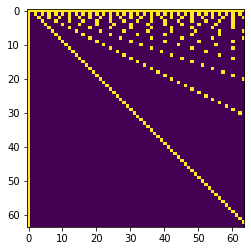

loss:  0 337.0


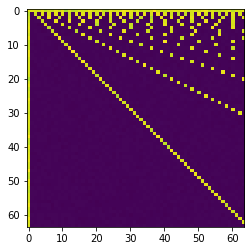

In [1]:
# NN feedback: self similarity?
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def softmax(x):
    """softmax applied to set of values x"""
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

modeldim = 64*64
nshown = modeldim
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = nshown+1, modeldim, 4, modeldim

inpt = np.zeros(modeldim) # input
y = np.zeros(D_out) # truth
#y[0] = 1
ndim2 = int(math.sqrt(modeldim))
for i in range(ndim2):
    for j in range(0,ndim2,i+1):
        y[i*ndim2+j] = 1 # some structured image
    
#print(y)
img_yp = y.reshape(ndim2, ndim2)
plt.imshow(img_yp)
plt.show()

# Randomly initialize weights
w1 = np.random.randn(D_in, H)*0.001
w2 = np.random.randn(H, D_out)*0.001

b1 = np.zeros(H) # bias
b2 = np.zeros(D_out)

mw1 = np.zeros_like(w1)
mw2 = np.zeros_like(w2)
mb1 = np.zeros_like(b1)
mb2 = np.zeros_like(b2)

# graph weights
#yw1 = []
#yw2 = []

learning_rate = 1e-3

for t in range(30):
    # Forward pass: compute predicted y
    #h = np.dot(inpt, w1) + b1
    h = np.dot(np.power(inpt, 2), w1) + b1 # try quadratic
    h_relu = h
    h_relu = np.maximum(h, 0)
    #h_relu = softmax(h)
    #y_pred = np.dot(h_relu, w2) + b2 # output
    y_pred = np.dot(w2.T, h_relu) + b2 # output

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 0:
        print('loss: ', t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = (y_pred - y)
    #print(h_relu, ' : ', grad_y_pred.T, ' : ', h_relu)
    grad_w2 = np.dot(h_relu, np.ones_like(w2)) * grad_y_pred # dw2 = (.) ReLu(h)
    grad_b2 = grad_y_pred
    grad_h_relu = np.dot(grad_y_pred, w2.T) # dw1 = (.) w2 ReLu'(h) x
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0 # ReLU'
    #grad_w1 = np.dot(inpt.T, np.ones_like(w1)) * grad_h
    grad_w1 = np.dot(np.power(inpt, 2).T, np.ones_like(w1)) * grad_h
    grad_b1 = np.dot(w2, grad_y_pred.T)

    # Update weights
    #w1 -= learning_rate * grad_w1
    #w2 -= learning_rate * grad_w2
    #b1 -= learning_rate * grad_b1.T[0]
    #b2 -= learning_rate * grad_b2[0]
    for param, dparam, mem in zip([w1, w2, b1, b2], [grad_w1, grad_w2, grad_b1.T[0], grad_b2[0]], [mw1, mw2, mb1, mb2]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update
        
    #yw1.append(np.sum(grad_w1))
    #yw2.append(np.sum(grad_w2))
    
    inpt += y_pred # feedback loop
        
#print('prediction: ', y_pred)
#x = range(len(yw1))
#print('w1')
#plt.plot(x, yw1)
#plt.show()
#print('w2')
#plt.plot(x, yw2)
#plt.show()

img_yp = y_pred.reshape(ndim2, ndim2)
plt.imshow(img_yp)
plt.show()

In [74]:
# climbing N steps
def stps_n(n, k):
    '''ways to climb n steps taking up to k at a time'''
    if n <= k:
        return k
    return sum([stps_n(n-k-i, k) for i in range(n-k+1)]) - 1

def main():
    print(stps_n(2,2))
    print(stps_n(3,2))
    print(stps_n(4,2))
    print(stps_n(5,2))
    print(stps_n(6,2))
    print(stps_n(7,2))

if __name__=='__main__':
    main()

2
3
5
8
13
21
